# Taller 3 Métodos Numéricos

El objetivo del taller es ejercitar los temas de interpolación e integración numérica. Por tal motivo, se deben resolver los siguientes ejercicios y responder las preguntas justificando adecuadamente.

## Evaluación y entrega
- La evaluación será mediante un coloquio con los docentes durante la clase.
- El taller se realiza en grupos hasta 2 ó 3 personas.

In [4]:
import numpy as np
from scipy.interpolate import interp1d
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt
from scipy.integrate import quad

## Ejercicio 1

## Ejercicio 1

Se desea construir una tabla de ocho cifras para la función $log(x)$ en el intervalo $(1,10)$, de tal manera que el error de la interpolación fragmentaria lineal sea menor a $10^{-6}$


* Determinar el tamaño del paso $h$ más grande posible y la cantidad de valores de la misma.

 **HINT:** Tener en cuenta que para cualquier x en el intervalo $(1,10)$, deberá existir un $j$  tal que  $x_{j} \leq x \leq x_{j+1}$ con $x_{j}= 1 + hj$ de manera tal que el polinomio interpolador lineal de Lagrange definido como
 
    $$ P(x) = L_{j}(x)f(x_{j}) + L_{j+1}(x)f(x_{j+1})$$ 
    
    en ese intervalo cumpla que el error de la interpolación verifica
    
    $$ |log(x) - P(x)| \leq 10^{6}$$   

**SOLUCIÓN:**

 <font color='red'>**COMPLETAR ACÁ**</font>

* Comparar y verifcar el error en puntos intermedios. Considerar usar la función [np.log(x)](https://docs.scipy.org/doc/numpy/reference/generated/numpy.log.html) y [np.around](https://numpy.org/doc/stable/reference/generated/numpy.around.html)


In [57]:
from math import floor, sqrt

def interpolacion_lineal(x, tabla):
    
    '''
    Evalua x utilizando interpolacion lineal fragmentaria a partir de la tabla con precision de 8 digitos para log(x)
    '''
    j = floor((x-1)/h)
    a = 1+j*h
    b = 1+(j+1)*h
    fa = tabla[j]
    fb = tabla[(j+1)%len(tabla)]

    assert(a <= x and x <= b)
    
    return (x-a)*(fb-fa)/(b-a) + fa

h = sqrt(8*10**-6)
intervalo = np.arange(1,10+h,h)
tabla = np.log(intervalo)

# Verifiquemos la interpolación en puntos iniciales
xs = intervalo
ys = [interpolacion_lineal(x, tabla) for x in xs]
assert(np.all(np.abs(ys - np.log(xs)) < 10**-6))

# Ahora consideremos  algunos puntos intermedios
xnew = np.arange(1,10,h/2)
ynew = [interpolacion_lineal(x, tabla) for x in xnew]
assert(np.all(np.abs(ynew - np.log(xnew)) < 10**-6))

print("Ok")

Ok


## Ejercicio 2

* Dados los puntos $(-1,3), (1,1), (2,3), (3,7)$, determinar cuántos **polinomios** de grado $d$ existen que pasen por *todos* los puntos, para d $\in \{2, 3, 4\} $. Justificar



**SOLUCIÓN:**

 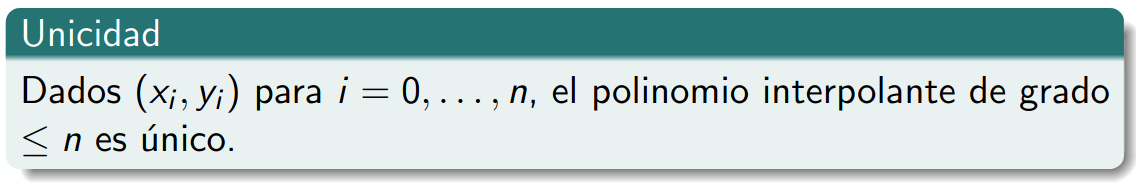
 
Para d = 2, y 3, por unicidad de polinomio interpolante, el mismo es único.

Para d = 4, tomando otro punto, se puede armar un polinomio interpolante entre ellos de lagrange. como hay uno distinto por cada punto (por unicidad), se puede concluir que hay infinitos polinomios interpolantes. puntos que no pasen por el pol anterior

* Para cada valor de $d$, en caso de ser posible, mostrar uno. 

**HINT:** Utilizar el método de diferencias divididas. **OPCIONAL**: Implementar el método de las diferencias divididas para encontrar los coeficientes de los polinomios que recibe eval_poli


* d=2: $3 - 1 (x+1) + 1 (x+1)(x-1)$
* d=3: $3 - 1 (x+1) + 1 (x+1)(x-1) + 0 (x+1)(x-1)(x-2)$ que es igual al d=2
* d=4: $3 - 1 (x+1) + 1 (x+1)(x-1) + 0.1666(x+1)(x-1)(x-2)(x-3)$

In [58]:
x = [-1, 1, 2, 3, 0]
y = [3, 1, 3, 7, 0]

def get_coef(x, y):
    coefs = y.copy()
    n = len(x)
    for i in range(1, n):
        for j in range(n-1, i-1, -1):
            coefs[j] = (coefs[j]-coefs[j-1]) / (x[j]-x[j-i])
    return coefs

get_coef(x,y)

[3, -1.0, 1.0, 0.0, 0.16666666666666674]

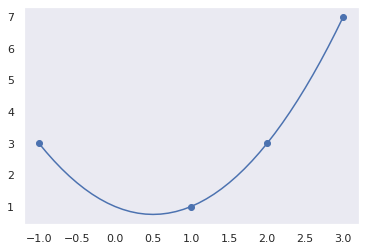

In [59]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


def eval_poli(xnew, coefs, x):
    evals = []
    for x_val in xnew:
        res = 0 
        for k, coef in enumerate(coefs):
            parcial = 1
            for i in range(k):
                parcial *= (x_val - x[i])
            res += coef * parcial
        evals.append(res)
    return evals


x = np.array([-1, 1, 2, 3])
y = np.array([ 3, 1, 3, 7])

# Mostrar el polinomio encontrado para cada d
coef = get_coef(x,y)
xnew = np.linspace(np.min(x), np.max(x), num=41, endpoint=True)
ynew = eval_poli(xnew, coef, x)

plt.plot(x,y,'bo')
plt.plot(xnew, ynew)
plt.grid()

## Ejercicio 3

Queremos aproximar la función coseno utilizando distintos tipos de splines y el polinomio de Lagrange para luego comparar el error obtenido.

Error Lagrange:0.03171174757248928
Error spline lineal0.7930831940837283


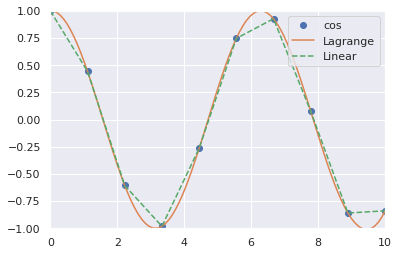

In [71]:
from scipy.interpolate import lagrange

x = np.linspace(0,10,num=10) 
y = np.cos(x)

# Obtengo los polinomios segun los nodos anteriores

linear = interp1d(x, y, kind='linear') 
lagr = lagrange(x, y) 

# Interpolamos en otros puntos

xs = np.linspace(0,10,100)
ys_lagr = lagr(xs)
ys_lin = linear(xs)

# Ploteamos

plt.plot(x, y, 'o', xs, ys_lagr, '-',  xs, ys_lin, '--')
plt.legend(['cos','Lagrange','Linear'], loc='best')
plt.grid(b=True,which='both')
plt.axis([0,10, -1, 1])

# Error

print("Error Lagrange:" + str(np.linalg.norm(np.cos(xs) - ys_lagr)))
print("Error spline lineal" + str(np.linalg.norm(np.cos(xs) - ys_lin)))

* Dada la siguiente tabla de datos que representa la silueta de un **pato**, probar disintos tipos de Splines junto con el polinomio de Lagrange, compararlos entre ellos y con respecto al caso anterior

| x    | 0.9 | 1.3 | 1.9  | 2.1 | 2.6 | 3.0 | 3.9 | 4.4  | 4.7  | 5.0 | 6.0  | 7.0 | 8.0  | 9.2  | 10.5 | 11.3 | 11.6 | 12.0 | 12.6 | 13.0 | 13.3 |
|------|-----|-----|------|-----|-----|-----|-----|------|------|-----|------|-----|------|------|------|------|------|------|------|------|------|
| f(x) | 1.3 | 1.5 | 1.85 | 2.1 | 2.6 | 2.7 | 2.4 | 2.15 | 2.05 | 2.1 | 2.25 | 2.3 | 2.25 | 1.95 | 1.4  | 0.9  | 0.7  | 0.6  | 0.5  | 0.4  | 0.25 |

(0.0, 14.0, -6.0, 4.0)

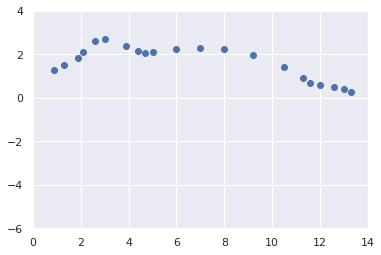

In [73]:
x = np.array([0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0,
              7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3])
y = np.array([1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 
              2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25])

plt.plot(x, y, 'o')
plt.grid(b=True,which='both')
plt.axis([0, 14, -6, 4])

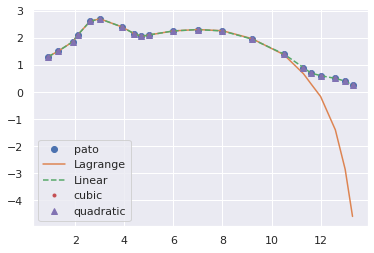

In [77]:
# COMPLETAR
# Obtengo los polinomios segun los nodos anteriores
linear = interp1d(x, y, kind='linear')
lagr = lagrange(x, y) 

cubic = interp1d(x, y, kind='cubic')
quadratic = interp1d(x, y, kind='quadratic')

# Interpolamos en otros puntos
xs = x
ys_lagr = lagr(xs)
ys_lin = linear(xs)
ys_cub = cubic(xs)
ys_cuad = quadratic(xs)

# Ploteamos
plt.plot(x, y, 'o', xs, ys_lagr, '-',  xs, ys_lin, '--', xs, ys_cub, '.', xs, ys_cuad, '^')
plt.legend(['pato','Lagrange','Linear','cubic','quadratic'], loc='best')
plt.grid(b=True,which='both')
plt.show()

## Ejercicio 4

* Deducir la fórmula de Newton-Cotes para $\int_{0}^{1}f(x)dx$ usando como nodos a los puntos $0,1$




**SOLUCIÓN:**

$$f(x) \approx P_n(x)$$
$$f(x) \approx \sum_{i=0}^n f(x_i)*L_{ni}(x)$$
$$\int_a^b f(x) \approx \sum_{i=0}^n f(x_i) \int_a^bL_{ni}(x)$$
basta tomar $a_i = \int_a^bL_{ni}(x)$ (tomando a=0 y b=1)

* Utilizar el punto anterior para integrar $\int_{0}^{1}e^{-x^{2}}dx$

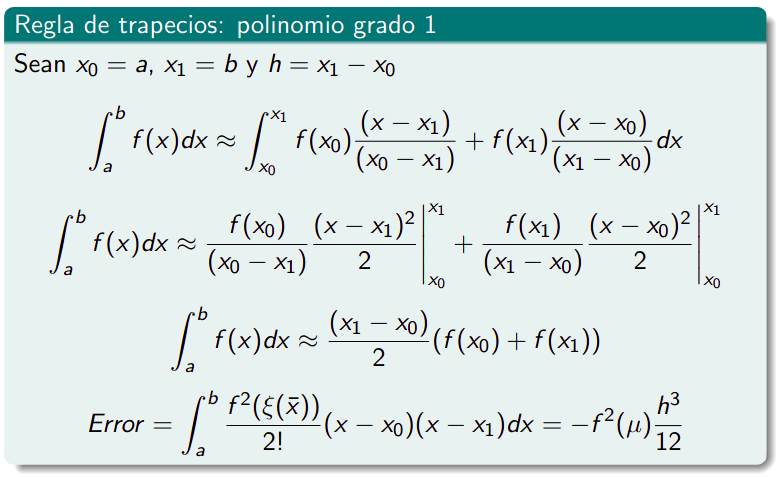
    
    
    
    
    
    

###  TRAPECIOS GRADO 1
$$\int_{x_0}^{x_1} f(x) \approx \frac{(x_1 - x_0)}{2}(f(x_0) + f(x_1)) $$

In [78]:
def trap (f,a,b):
    dist = b - a 
    dist /= 2
    return dist*(f(a) + f(b))

def rectaTrapecios(f, a,b,granularidad = 100):
    ejex = np.linspace(a,b,granularidad)
    
    return [ x*(f(b) - f(a)) + f(a) for x in ejex]

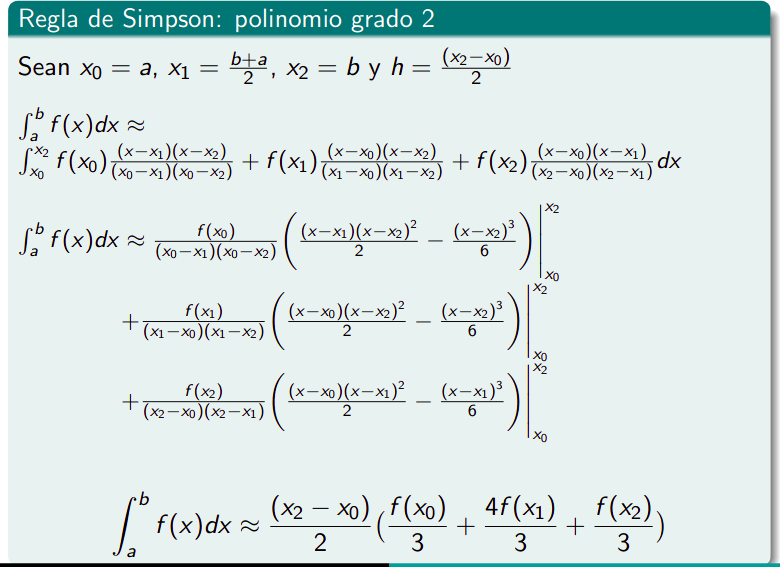 

###  Regla de Simpson 
$$ Sea \quad x_1 =  \frac{(x_0 + x_2)}{2}      $$
$$\int_{x_0}^{x_2} f(x) \approx \frac{(x_2 - x_0)}{2}\frac{(f(x_0) +f(x_2)+ 4f(x_1))}{3}$$

In [79]:
def simpson(f,a,b):
        
        dist = b - a
        x1 = (b+a) / 2 
        res = dist *(f(a) + f(b) + 4*f( x1))
        
        return res/6

In [80]:
import math 
def f(x):

    return math.exp(-x**2)

# Pueden comparar contra esta función de scipy

true_integral = quad(f, 0, 1)[0]

integral = trap (f, 0,1)

simp = simpson(f,0,1)
 
print( f" Integral de scipy: {true_integral} \n Trapecios: {integral} \n Simpson: {simp} ")

 Integral de scipy: 0.7468241328124271 
 Trapecios: 0.6839397205857212 
 Simpson: 0.7471804289095103 


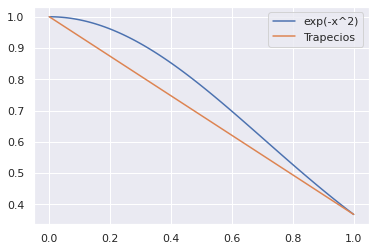

In [81]:
ejex = np.linspace(0,1,100)
y = [ f(a) for a in ejex]
import seaborn as sns
sns.lineplot(x = ejex , y = y, label = "exp(-x^2)")
trapY = [ x*(f(1) - f(0)) + f(0) for x in ejex]
sns.lineplot(x = ejex , y = trapY, label = "Trapecios")
plt.show()

## Ejercicio 5

* Indicar cuántos puntos se deben tomar en la aproximación de
$$
\int_{0}^{1}\exp (-x^{2})dx
$$
por medio de la regla de los Trapecios Compuesta para que el error sea menor que $10^{-6}$.

**HINT**: Graficar el modulo de la segunda derivada de $\exp (-x^{2})$

# **SOLUCIÓN:**

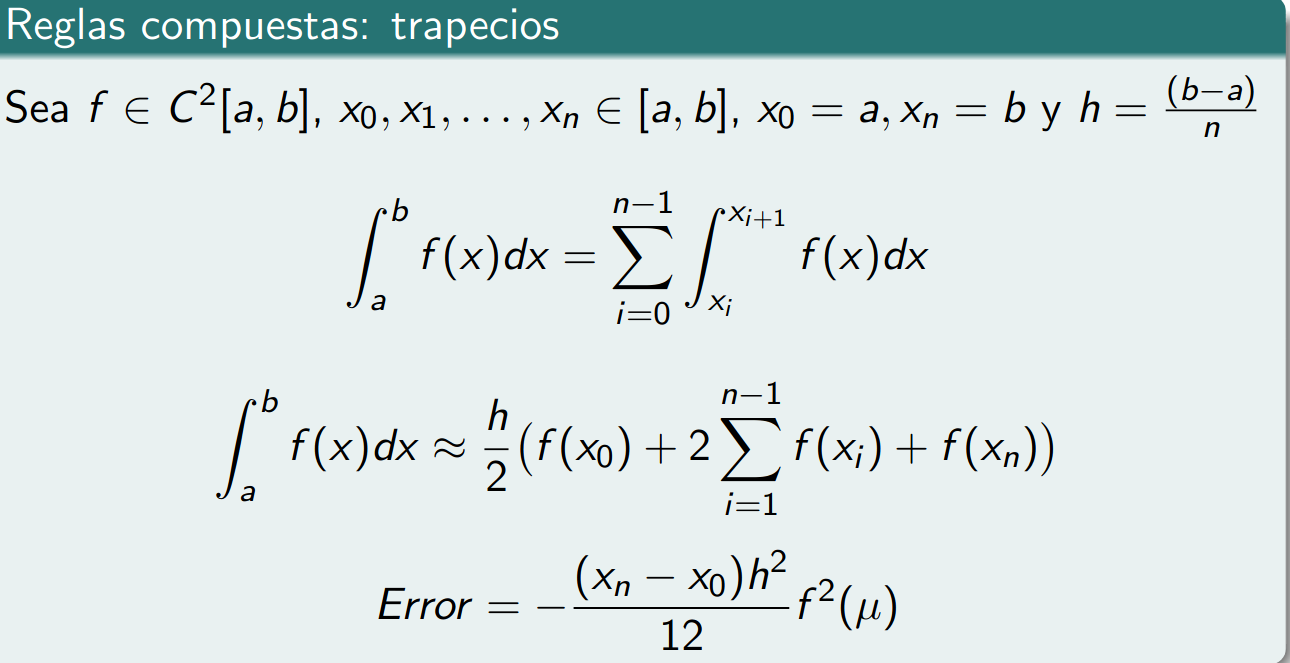


## Despejamos la fórmula del error:
### $$ observación : \quad x_n - x_0 = 1 - 0 = 1  $$
### $$ h < \sqrt{ \frac{ 12 \cdot 10^{-6} }{ -f^2(u)} }$$

### el modulo de la segunda derivada de $e^{(-x^{2})}$ es $(4x^2 - 2)e^{(-x^{2})} $

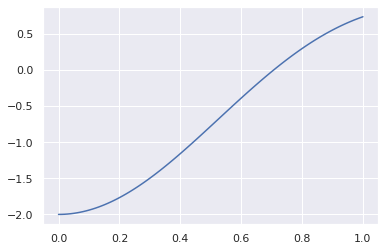

In [50]:
#graficar derivada segunda 
# exp(-x^2)'' = (-2x exp( -x^2)) ' = (4x^2 − 2)e^(−x^2)
def deriva2 (x ):
    return (4*(x**2) - 2)*math.exp(-x**2)
ejex = np.linspace(0,1,100)
y = [ deriva2(x) for x in ejex]
sns.set_theme()
sns.lineplot(x = ejex , y = y)

#plt.grid()
plt.show()

### Para acotar el h tomamos el maximo posible de $\sqrt{ \frac{ 12 \cdot 10^{-6} }{ -f^2(u)} }$
### Tomamos el minimo de $  f^2(u)$
### A partir del grafico previo observamos que el minimo en el intervalo [0,1] es -2

### $$h ≤ \sqrt{ [  6⋅10⁻⁶ ]}   $$

### Como h es igual a $1/n$  por lo tanto :
   $$ n > \frac {1}{ \sqrt{ [  6⋅10⁻⁶ ]}}   =  408.24 $$
### Entonces basta con tomar mas 410 puntos



In [44]:
1/math.sqrt(6*(10**-6))

408.248290463863

## Calcular la aprox de la integral y comparar con el ej anterior

In [94]:
h = 1.0/409
intervalo = np.arange(0,1+h,h)
xs = intervalo

def f(x):
    return np.exp(-(x**2))

n=409
valor = (f(xs[0])+2 * np.sum(f(xs[1:n]))+f(xs[n]))*(h/2)
# valor = sum([trap(f, intervalo[i], intervalo[i+1]) for i in range(len(intervalo)-1)])

# Verifiquemos la interpolación en puntos iniciales


true_integral = quad(f, 0, 1)[0]

integral = trap (f, 0,1)

simp = simpson(f,0,1)
 
print( f" Integral de scipy: {true_integral} \n Trapecios: {integral} \n Simpson: {simp} \n Trap. comp.: {valor} ")

 Integral de scipy: 0.7468241328124271 
 Trapecios: 0.6839397205857212 
 Simpson: 0.7471804289095103 
 Trap. comp.: 0.7468237662839365 
